In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns


In [95]:
path = Path.cwd()
playerInfo_df = pd.read_csv(f"{path}/data/Master.csv")
battingInfo_df = pd.read_csv(f"{path}/data/Batting.csv")
picthingInfo_df = pd.read_csv(f"{path}/data/Pitching.csv")
teamsInfo_df = pd.read_csv(f"{path}/data/Teams.csv")
fieldingInfo_df = pd.read_csv(f"{path}/data/Fielding.csv")

In [96]:
teamsInfo_df.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [97]:
battingInfo_df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [98]:
picthingInfo_df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [99]:
fieldingInfo_df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS', 'ZR'],
      dtype='object')

The data ages back to 1800s and the rules of the league have evolved ever since. Since 1961 the American League
expanded to 162 game-season and the National League followed the same the following year. 
To get a clear picture we will take data from 1961 as this can be considered as the start of a modern era where both the leagues started adopting same number of games


In [100]:
teamsInfo_df = teamsInfo_df[teamsInfo_df['yearID'] >= 1961]
battingInfo_df = battingInfo_df[battingInfo_df['yearID'] >= 1961]
picthingInfo_df = picthingInfo_df[picthingInfo_df['yearID'] >= 1961]
fieldingInfo_df = fieldingInfo_df[fieldingInfo_df['yearID'] >= 1961]

## Column Selection

The .csv files have a lot of columns out of which we will choose some relevant columns and carry out some EDA and gather inference

The question is "Teams success depends on which factors batting, fielding or pitching?" 
So our traget will be number of wins for each team. So in teamsInfo_df we will keep the team details columns, games played, wins and losses. We can also create win ratios using our current dataset

For batting we will consider the playerId, team,games played, runs scored, home runs, RBI, 2B, 3B. 

For pitching we will consider playerId, team, games played, W, L, G (Games pitched), H, ER, HR, SO(Strikeouts)

For fielding we will consider playerId, team, POS, games played at position, Assists,errors and Putouts

The feature selection is done purely based on the domain analysis of baseball that seem relevant to the asked question, this can further be dropped or increased based on further analysis


In [101]:
teamsInfo_df = teamsInfo_df[['yearID','G', 'W', 'L', 'teamID']]
print(teamsInfo_df.head(5))
battingInfo_df = battingInfo_df[['playerID', 'yearID','teamID','G', 'R', 'HR', 'RBI', '2B', '3B']]
print(battingInfo_df.head(5))
picthingInfo_df = picthingInfo_df[['playerID', 'yearID', 'teamID', 'G', 'W', 'L','H','ER','HR','SO','ERA']]
print(picthingInfo_df.head(5))
fieldingInfo_df = fieldingInfo_df[['playerID', 'yearID', 'teamID', 'POS', 'GS', 'A', 'E', 'PO']]
print(fieldingInfo_df.head(5))

      yearID    G   W   L teamID
1359    1961  163  95  67    BAL
1360    1961  163  76  86    BOS
1361    1961  163  86  76    CHA
1362    1961  156  64  90    CHN
1363    1961  154  93  61    CIN
        playerID  yearID teamID    G      R    HR    RBI    2B    3B
41245  aaronha01    1961    ML1  155  115.0  34.0  120.0  39.0  10.0
41246  adairje01    1961    BAL  133   41.0   9.0   37.0  21.0   1.0
41247  adcocjo01    1961    ML1  152   77.0  35.0  108.0  20.0   0.0
41248  aguirha01    1961    DET   45    0.0   0.0    1.0   0.0   0.0
41249  allenbo04    1961    CLE   48    0.0   0.0    0.0   1.0   0.0
        playerID  yearID teamID   G  W   L    H  ER  HR  SO   ERA
16198  aguirha01    1961    DET  45  4   4   44  20   5  32  3.25
16199  allenbo04    1961    CLE  48  3   2   96  34   7  42  3.75
16200  anderbo01    1961    CHN  57  7  10  162  72  14  96  4.26
16201  andercr01    1961    SLN  25  4   3   38  14   3  21  3.26
16202  antonjo02    1961    CLE  11  0   4   68  35   8  2

We make an extra column of win ratio which helps us better in visualization and give more context

In [102]:
teamsInfo_grouped_df = teamsInfo_df.groupby(['teamID']).sum()
del teamsInfo_grouped_df['yearID']
teamsInfo_grouped_df['WinRatio'] = (teamsInfo_grouped_df['W']/teamsInfo_grouped_df['G']).round(2) * 100
print(teamsInfo_grouped_df.head(5))
teamsInfo_grouped_df.shape[0]



           G     W     L  WinRatio
teamID                            
ANA     1296   664   632      51.0
ARI     2916  1434  1482      49.0
ATL     7965  4106  3851      52.0
BAL     8763  4548  4209      52.0
BOS     8775  4643  4130      53.0


39

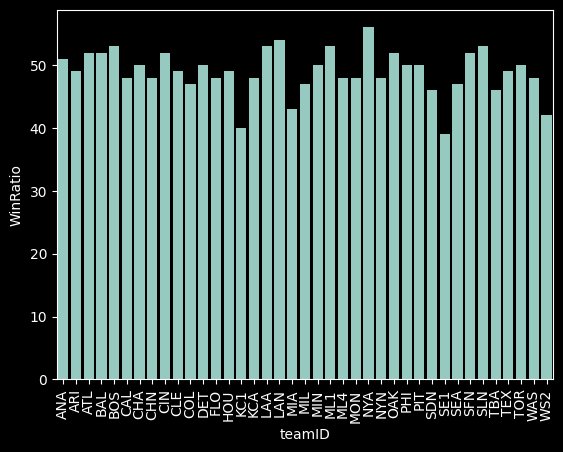

In [103]:
ax = sns.barplot(data=teamsInfo_grouped_df, x='teamID', y='WinRatio')
ax.tick_params(axis='x', labelrotation=90)

Based on the above plot we have 39 unique teams and their win ratios with a max of around 60% and lowest of around 37% also the data seems of good quality and good distribution as well.

Since we are looking to answer on a team level we will group all of your data on that. We will create a dataframe which has all the stats summed up for a team, for example the total runs they have till the 2015 season starting from 1961, the number of strikeouts they have and plot them over the win ratio

In [104]:
battingInfo_grouped_df = battingInfo_df.set_index('teamID')
battingInfo_grouped_df = battingInfo_df.groupby(['teamID']).sum()
battingInfo_grouped_df = battingInfo_grouped_df.drop(['yearID', 'playerID','G'], axis=1)
print(battingInfo_grouped_df.head(5))
print(battingInfo_grouped_df.shape[0])

              R      HR      RBI       2B      3B
teamID                                           
ANA      6305.0  1324.0   5967.0   2306.0   236.0
ARI     13153.0  2987.0  12551.0   5255.0   724.0
ATL     34593.0  7535.0  32622.0  12074.0  1375.0
BAL     39250.0  8968.0  37133.0  13788.0  1386.0
BOS     42196.0  8904.0  39942.0  15977.0  1762.0
39


In [105]:
picthingInfo_grouped_df = picthingInfo_df.set_index('teamID')
picthingInfo_grouped_df = picthingInfo_df.groupby(['teamID']).sum()
picthingInfo_grouped_df = picthingInfo_grouped_df.drop(['playerID', 'yearID', 'HR','G','W','L'], axis=1)
picthingInfo_grouped_df.head(5)

,H,ER,SO,ERA
teamID,,,,
ANA,11710,5658,7954,743.17
ARI,25991,12253,21037,2545.62
ATL,69449,29958,48576,4790.60
BAL,76526,34873,49783,5090.22
BOS,78748,35738,54129,5375.48


In [106]:
fieldingInfo_grouped_df = fieldingInfo_df.set_index('teamID')
fieldingInfo_grouped_df = fieldingInfo_df.groupby(['teamID']).sum()
fieldingInfo_grouped_df = fieldingInfo_grouped_df.drop(['playerID', 'yearID', 'POS', 'GS'], axis=1)
fieldingInfo_grouped_df.head(5)

,A,E,PO
teamID,,,
ANA,13104.0,903.0,38102.0
ARI,29718.0,1869.0,81452.0
ATL,88112.0,7088.0,249074.0
BAL,94691.0,6410.0,278209.0
BOS,92424.0,7434.0,276990.0


In [107]:
final_df = pd.merge(pd.merge(pd.merge(teamsInfo_grouped_df, picthingInfo_grouped_df, on='teamID'), 
                    fieldingInfo_grouped_df,on='teamID'), battingInfo_grouped_df, on='teamID')


In [108]:
final_df.head(5)

,G,W,L,WinRatio,H,ER,SO,ERA,A,E,PO,R,HR,RBI,2B,3B
teamID,,,,,,,,,,,,,,,,
ANA,1296,664,632,51.0,11710,5658,7954,743.17,13104.0,903.0,38102.0,6305.0,1324.0,5967.0,2306.0,236.0
ARI,2916,1434,1482,49.0,25991,12253,21037,2545.62,29718.0,1869.0,81452.0,13153.0,2987.0,12551.0,5255.0,724.0
ATL,7965,4106,3851,52.0,69449,29958,48576,4790.60,88112.0,7088.0,249074.0,34593.0,7535.0,32622.0,12074.0,1375.0
BAL,8763,4548,4209,52.0,76526,34873,49783,5090.22,94691.0,6410.0,278209.0,39250.0,8968.0,37133.0,13788.0,1386.0
BOS,8775,4643,4130,53.0,78748,35738,54129,5375.48,92424.0,7434.0,276990.0,42196.0,8904.0,39942.0,15977.0,1762.0


In [109]:
final_df['Avg_Runs'] = (final_df['R'] / final_df['G']).round(2)
final_df['Pitching_SO_AVG'] = (final_df['SO'] / final_df['G']).round(2)
final_df['Avg_HR'] = (final_df['HR'] / final_df['G']).round(2)
final_df['Avg_Assists'] = (final_df['A'] / final_df['G']).round(2)
final_df['Avg_errors'] = (final_df['E'] / final_df['G']).round(2)
final_df['Avg_PO'] = (final_df['PO'] / final_df['G']).round(2)
final_df['Avg_ERA'] = (final_df['ERA'] / final_df['G']).round(2)
final_df.head(5)

,G,W,L,WinRatio,H,ER,SO,ERA,A,E,...,RBI,2B,3B,Avg_Runs,Pitching_SO_AVG,Avg_HR,Avg_Assists,Avg_errors,Avg_PO,Avg_ERA
teamID,,,,,,,,,,,,,,,,,,,,,
ANA,1296,664,632,51.0,11710,5658,7954,743.17,13104.0,903.0,...,5967.0,2306.0,236.0,4.86,6.14,1.02,10.11,0.70,29.40,0.57
ARI,2916,1434,1482,49.0,25991,12253,21037,2545.62,29718.0,1869.0,...,12551.0,5255.0,724.0,4.51,7.21,1.02,10.19,0.64,27.93,0.87
ATL,7965,4106,3851,52.0,69449,29958,48576,4790.60,88112.0,7088.0,...,32622.0,12074.0,1375.0,4.34,6.10,0.95,11.06,0.89,31.27,0.60
BAL,8763,4548,4209,52.0,76526,34873,49783,5090.22,94691.0,6410.0,...,37133.0,13788.0,1386.0,4.48,5.68,1.02,10.81,0.73,31.75,0.58
BOS,8775,4643,4130,53.0,78748,35738,54129,5375.48,92424.0,7434.0,...,39942.0,15977.0,1762.0,4.81,6.17,1.01,10.53,0.85,31.57,0.61


In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_check = final_df.drop(['G','W','L','H','SO','A','E','HR','RBI','2B','3B','ER','PO','R'], axis=1)
vif = pd.DataFrame()
vif['feature'] = vif_check.columns
vif['VIF'] = [variance_inflation_factor(vif_check.values,i) for i in range(len(vif_check.columns))]
vif

,feature,VIF
0,WinRatio,1232.980047
1,ERA,7.683826
2,Avg_Runs,1281.381057
3,Pitching_SO_AVG,363.841481
4,Avg_HR,199.263723
5,Avg_Assists,1439.143707
6,Avg_errors,225.136978
7,Avg_PO,1566.228807
8,Avg_ERA,169.138664


After some trail and error with the columns, the VIF(variance inflation factor) shows high collinearity with WinRatio (or other columns) which in a way is good news and bolsters our assumption that the columns that we have selected are inter-related. We can check win ratio's with the respective batting, fielding and pitching stats. The vif values are way too high because ERA is dependent on Avg_Runs and Avg_HR, Avg_assists + Avg_PO are highly related features.

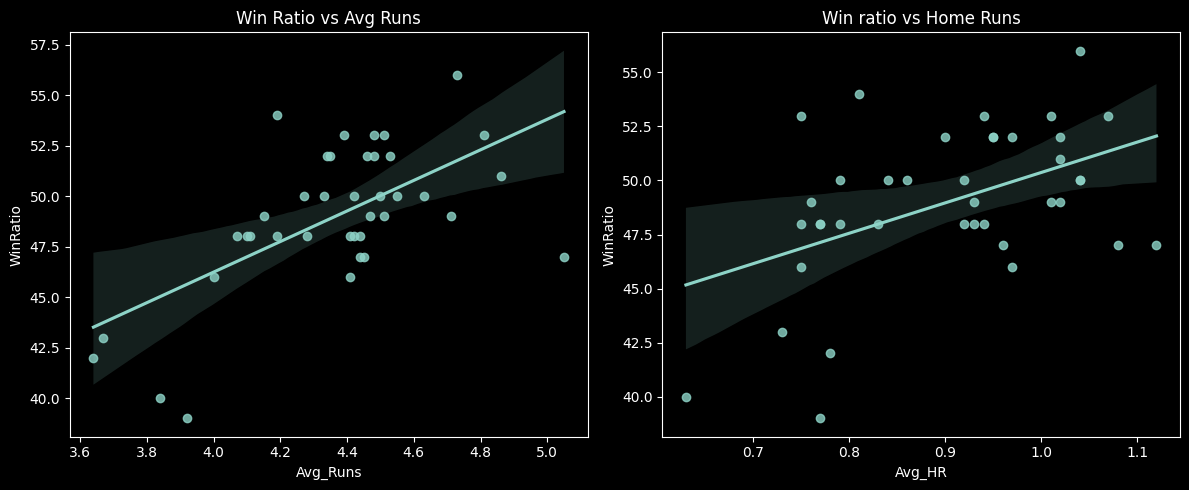

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x='Avg_Runs',y='WinRatio', data=final_df, ax=axes[0])
axes[0].set_title('Win Ratio vs Avg Runs')

sns.regplot(x='Avg_HR', y='WinRatio', data=final_df, ax=axes[1])
axes[1].set_title('Win ratio vs Home Runs')
plt.tight_layout()

plt.show()

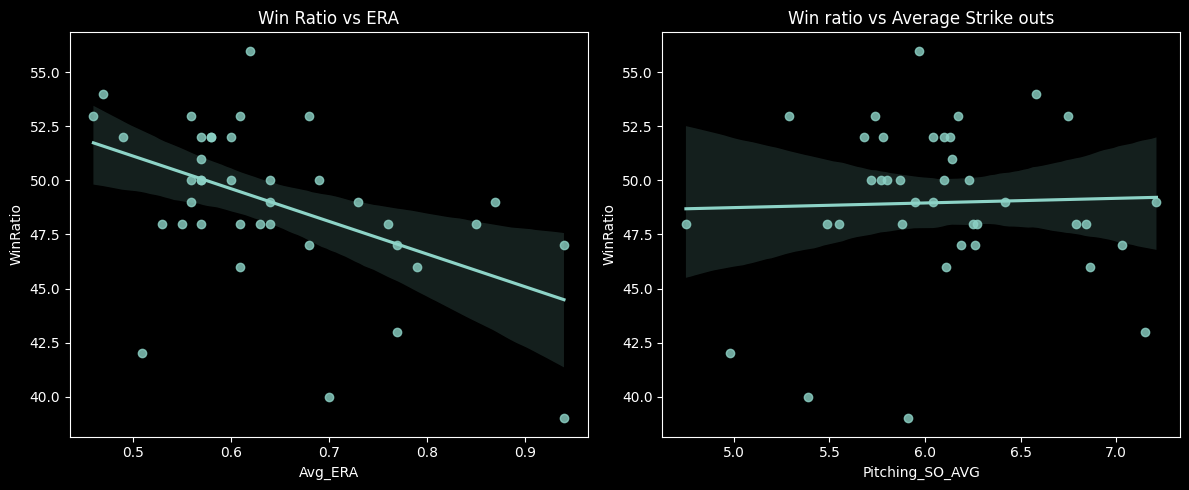

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x='Avg_ERA',y='WinRatio', data=final_df, ax=axes[0])
axes[0].set_title('Win Ratio vs ERA')

sns.regplot(x='Pitching_SO_AVG', y='WinRatio', data=final_df, ax=axes[1])
axes[1].set_title('Win ratio vs Average Strike outs')
plt.tight_layout()

plt.show()

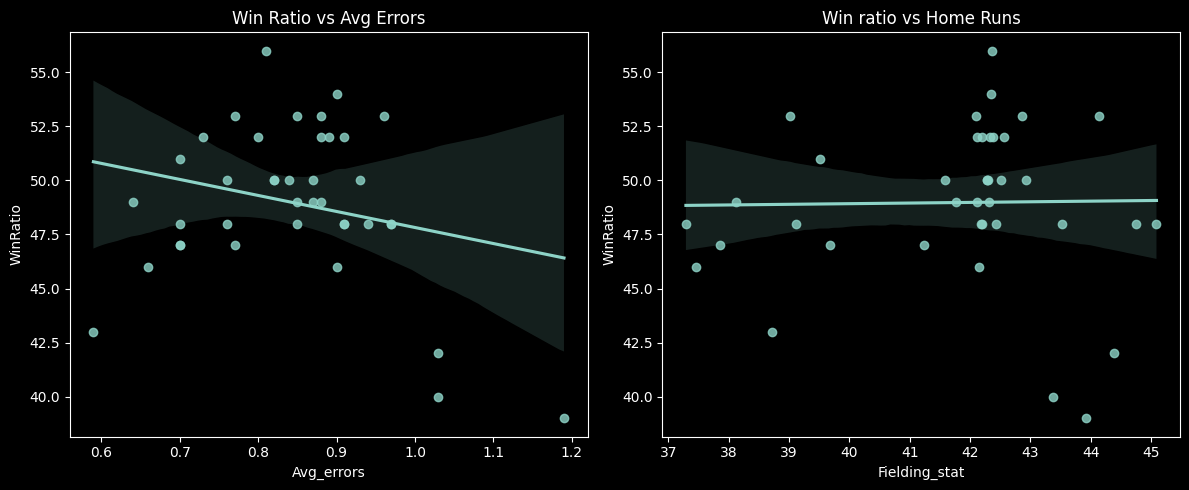

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x='Avg_errors',y='WinRatio', data=final_df, ax=axes[0])
axes[0].set_title('Win Ratio vs Avg Errors')

final_df['Fielding_stat'] = final_df['Avg_Assists'] + final_df['Avg_PO']
sns.regplot(x='Fielding_stat', y='WinRatio', data=final_df, ax=axes[1])
axes[1].set_title('Win ratio vs Home Runs')
plt.tight_layout()

plt.show()

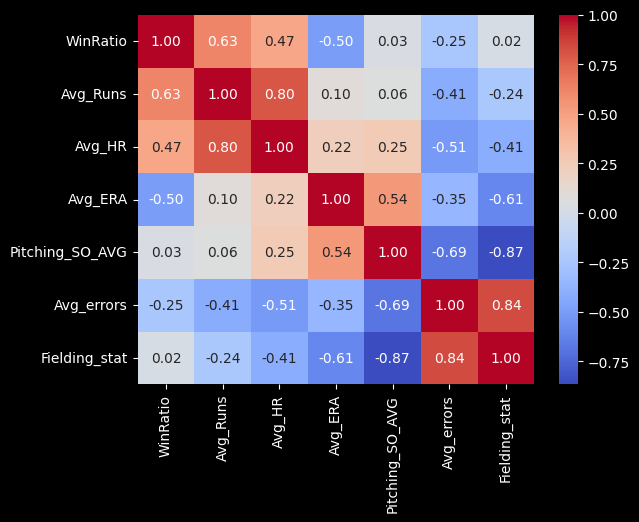

In [114]:
correlation_features = ['WinRatio', 'Avg_Runs', 'Avg_HR', 'Avg_ERA', 'Pitching_SO_AVG', 'Avg_errors', 'Fielding_stat']
corr_matrix = final_df[correlation_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Form the above plots we can conclude that High runs contribute to winning, but average home runs is clustered in the center which also indicates that home runs do not directly infulence the winning ration. But is a smaller factor out of higher runs. In short higher runs contribute in wins but alone home runs do not. 
For pitching stats ERA with WinRatio and Average strike outs. If a team concedes less runs on average then the win ratio is better and the negative slope also shows this trend that the teams that leak more runs have less win ratio
For fielding the trend is mostly flat which indicates that fielding on its own cannot be a relevant factor for a team's success. But we can do some more exploration and combine the fielding stats to see if get any good effects.
We will not combine batting and pitching since it will be very obvious that if teams have both good batting and pitching they are more likely to succeed

In [115]:
import statsmodels.api as sm

features = ['Avg_Runs', 'Avg_HR', 'Avg_errors', 'Fielding_stat']
X = final_df[features]
y = final_df['WinRatio']

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               WinRatio   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     7.628
Date:                Thu, 08 May 2025   Prob (F-statistic):           0.000169
Time:                        20:42:54   Log-Likelihood:                -92.476
No. Observations:                  39   AIC:                             195.0
Df Residuals:                      34   BIC:                             203.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.4586     14.187     -0.667

In [116]:
features = ['Avg_ERA', 'Pitching_SO_AVG', 'Avg_errors', 'Fielding_stat']
X = final_df[features]
y = final_df['WinRatio']

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               WinRatio   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     7.682
Date:                Thu, 08 May 2025   Prob (F-statistic):           0.000160
Time:                        20:42:54   Log-Likelihood:                -92.411
No. Observations:                  39   AIC:                             194.8
Df Residuals:                      34   BIC:                             203.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              34.7087     33.940     

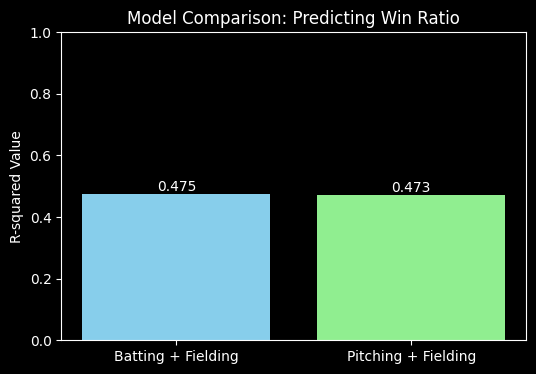

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
models = ['Batting + Fielding', 'Pitching + Fielding']
r_squared = [0.475, 0.473]

plt.bar(models, r_squared, color=['skyblue', 'lightgreen'])
plt.ylabel('R-squared Value')
plt.title('Model Comparison: Predicting Win Ratio')
plt.ylim(0, 1)
for i, v in enumerate(r_squared):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()


## Short summary
Based on the analysis carried out we can say that High Average runs, Low average ERA were the major impacting factors which show that a team can get away with a win if they have strong hitters but weak pitchers or strong pitchers but weak batters.
Apart from the individual plots, the heatmap of the correlation matrix gives us the same evidence. Fielding is a mild contributor in this case the one factor that we could observe was that teams with less error had more of an advantage but the assists and putouts combination did not yeild any beneficial results.

However, the cluster of pitching is much more densed as compared to the one with average runs. So I am inclined to believe strong pitching is much more effective than strong hitting based on this dataset. 

But there are gaps in this since the data contains records for more than 100 years of baseball and the sport has taken quite a shift since the early days. To verify our results we will re-run some of the results just on modern days stats(10 years only) and check how our results hold up.

In [132]:
# Reloading the data and carrying out the process again only difference is we will consider only 10 years of data for now
path = Path.cwd()
playerInfo_df = pd.read_csv(f"{path}/data/Master.csv")
battingInfo_df = pd.read_csv(f"{path}/data/Batting.csv")
picthingInfo_df = pd.read_csv(f"{path}/data/Pitching.csv")
teamsInfo_df = pd.read_csv(f"{path}/data/Teams.csv")
fieldingInfo_df = pd.read_csv(f"{path}/data/Fielding.csv")

teamsInfo_df = teamsInfo_df[['yearID','G', 'W', 'L', 'teamID']]
battingInfo_df = battingInfo_df[['playerID', 'yearID','teamID','G', 'R', 'HR', 'RBI', '2B', '3B']]
picthingInfo_df = picthingInfo_df[['playerID', 'yearID', 'teamID', 'G', 'W', 'L','H','ER','HR','SO','ERA']]
fieldingInfo_df = fieldingInfo_df[['playerID', 'yearID', 'teamID', 'POS', 'GS', 'A', 'E', 'PO']]


teamsInfo_latest_df = teamsInfo_df[teamsInfo_df['yearID'] > teamsInfo_df['yearID'].max() - 10]
battingInfo_latest_df = battingInfo_df[battingInfo_df['yearID'] > battingInfo_df['yearID'].max() - 10]
pitchingInfo_latest_df = picthingInfo_df[picthingInfo_df['yearID'] > picthingInfo_df['yearID'].max() - 10]
fieldingInfo_latest_df = fieldingInfo_df[fieldingInfo_df['yearID'] > fieldingInfo_df['yearID'].max() - 10]

teamsInfo_latest_df = teamsInfo_df.set_index('teamID')
battingInfo_latest_df = battingInfo_df.set_index('teamID')
pitchingInfo_latest_df = picthingInfo_df.set_index('teamID')
fieldingInfo_latest_df = fieldingInfo_df.set_index('teamID')

teamsInfo_latest_df = teamsInfo_latest_df.groupby(['teamID']).sum()
del teamsInfo_latest_df['yearID']
teamsInfo_latest_df['WinRatio'] = (teamsInfo_latest_df['W']/teamsInfo_latest_df['G']).round(2) * 100


battingInfo_latest_df = battingInfo_df.groupby(['teamID']).sum()
battingInfo_latest_df = battingInfo_latest_df.drop(['yearID', 'playerID','G'], axis=1)

picthingInfo_latest_df = picthingInfo_df.groupby(['teamID']).sum()
picthingInfo_latest_df = picthingInfo_latest_df.drop(['playerID', 'yearID', 'HR','G','W','L'], axis=1)

fieldingInfo_latest_df = fieldingInfo_df.groupby(['teamID']).sum()
fieldingInfo_latest_df = fieldingInfo_latest_df.drop(['playerID', 'yearID', 'POS', 'GS'], axis=1)

final_latest_df = pd.merge(pd.merge(pd.merge(teamsInfo_latest_df, picthingInfo_latest_df, on='teamID'), 
                    fieldingInfo_latest_df,on='teamID'), battingInfo_latest_df, on='teamID')



In [137]:
final_latest_df['Avg_Runs'] = (final_latest_df['R'] / final_latest_df['G']).round(2)
final_latest_df['Pitching_SO_AVG'] = (final_latest_df['SO'] / final_latest_df['G']).round(2)
final_latest_df['Avg_HR'] = (final_latest_df['HR'] / final_latest_df['G']).round(2)
final_latest_df['Avg_Assists'] = (final_latest_df['A'] / final_latest_df['G']).round(2)
final_latest_df['Avg_errors'] = (final_latest_df['E'] / final_latest_df['G']).round(2)
final_latest_df['Avg_PO'] = (final_latest_df['PO'] / final_latest_df['G']).round(2)
final_latest_df['Avg_ERA'] = (final_latest_df['ERA'] / final_latest_df['G']).round(2)
final_latest_df['Fielding_stat'] = final_latest_df['Avg_Assists'] + final_latest_df['Avg_PO']
final_latest_df.head(5)

,G,W,L,WinRatio,H,ER,SO,ERA,A,E,...,2B,3B,Avg_Runs,Pitching_SO_AVG,Avg_HR,Avg_Assists,Avg_errors,Avg_PO,Avg_ERA,Fielding_stat
teamID,,,,,,,,,,,,,,,,,,,,,
ALT,25,6,19,24.0,292,114,93,30.47,316.0,156.0,...,30.0,6.0,3.60,3.72,0.08,12.64,6.24,26.32,1.22,38.96
ANA,1296,664,632,51.0,11710,5658,7954,743.17,13104.0,903.0,...,2306.0,236.0,4.86,6.14,1.02,10.11,0.70,29.40,0.57,39.51
ARI,2916,1434,1482,49.0,25991,12253,21037,2545.62,29718.0,1869.0,...,5255.0,724.0,4.51,7.21,1.02,10.19,0.64,27.93,0.87,38.12
ATL,7965,4106,3851,52.0,69449,29958,48576,4790.60,88112.0,7088.0,...,12074.0,1375.0,4.34,6.10,0.95,11.06,0.89,31.27,0.60,42.33
BAL,9844,5041,4791,51.0,85631,38901,54796,5785.46,106536.0,7490.0,...,15132.0,1622.0,4.39,5.57,0.97,10.82,0.76,31.95,0.59,42.77


In [141]:
import statsmodels.api as sm

features = ['Avg_Runs', 'Avg_HR', 'Avg_errors', 'Fielding_stat']
X = final_latest_df[features]
y = final_latest_df['WinRatio']

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               WinRatio   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     62.92
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.16e-30
Time:                        21:33:11   Log-Likelihood:                -532.58
No. Observations:                 149   AIC:                             1075.
Df Residuals:                     144   BIC:                             1090.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.5605     19.548      0.847

In [142]:
features = ['Avg_ERA', 'Pitching_SO_AVG', 'Avg_errors', 'Fielding_stat']
X = final_latest_df[features]
y = final_latest_df['WinRatio']

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               WinRatio   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     23.54
Date:                Thu, 08 May 2025   Prob (F-statistic):           5.43e-15
Time:                        21:33:26   Log-Likelihood:                -570.39
No. Observations:                 149   AIC:                             1151.
Df Residuals:                     144   BIC:                             1166.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              59.3305     24.639     

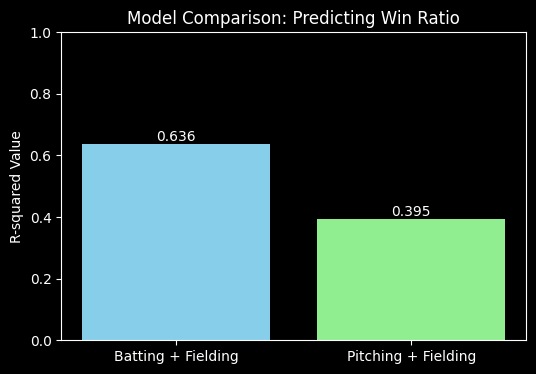

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
models = ['Batting + Fielding', 'Pitching + Fielding']
r_squared = [0.636, 0.395]

plt.bar(models, r_squared, color=['skyblue', 'lightgreen'])
plt.ylabel('R-squared Value')
plt.title('Model Comparison: Predicting Win Ratio')
plt.ylim(0, 1)
for i, v in enumerate(r_squared):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()


## Conclusion
This data shows contrast as compared to the previous results. The modern era of baseball has evolved more towards powerful hitter who take it offence rather than defense. While pitching metrics like ERA still maintain a negative relationship with Win Ratio, the overall model has less predictive power in recent years. 
This indicates that batting performance—especially run production—has become a more dominant predictor of team success.\

Our results indicate a clear shift in the modern game: successful teams now win more through offense than defense. As teams adapt to a high-scoring era, analytical models and scouting strategies should prioritize batting metrics when evaluating performance potential.